# 1. Let's make your own CNN model.
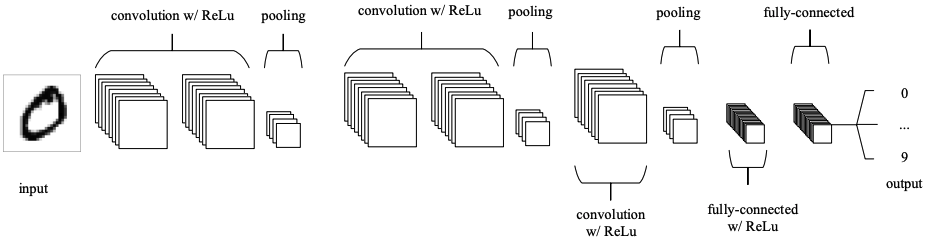
- Let's create your own model with good accuracy and learning rate, considering the necessary elements for CNN (Convolutional Neural Network) design.
- Data: CIFAR-10
- 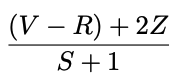


- Where V represents the input volume size (height×width×depth), R represents
the receptive field size, Z is the amount of zero padding set and S referring to
the stride.

## What does CIFAR-10 look like?

# 2. Transfer Learning with ResNet-18 and CIFAR-10.

### In this notebook, we will fine-tune a pre-trained ResNet-18 model on the CIFAR-10 dataset using PyTorch.

> Transfer learning means applying what a model has already learned to a new but similar problem.

> ResNet18 has been trained with dataset, ImageNet. It has 1000 image classes (e.g., cat, dog, plane, pizza...) with 224x224 input size.

*Goal:*
- Understand what transfer learning is
- Load and preprocess the CIFAR-10 dataset
- Modify a pre-trained ResNet-18 model for CIFAR-10 classification
- Train and evaluate the model
-


## 2-1. Import Libraries

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
import matplotlib.pyplot as plt


## 2-2. Data Preprocessing and Loading
Resize CIFAR-10 images to 224x224 because ResNet-18 expects that input size.

In [ ]:
transform = transforms.Compose([
    # transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

classes = trainset.classes


## 2-4. Load and Modify Pre-trained Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(pretrained=True)

# 2. 모든 파라미터 freeze (기존 학습된 특징 추출기 고정)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 10)  # Adjust for 10 CIFAR-10 classes
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## 2-5. Loss Function and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

##2-6. Training Loop

In [ ]:
epochs = 5  # 필요에 따라 3으로 줄여도 OK

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss:.4f}")

Epoch [1/5], Loss: 2710.9622
Epoch [2/5], Loss: 2569.9555
Epoch [3/5], Loss: 2545.2240
Epoch [4/5], Loss: 2545.5870
Epoch [5/5], Loss: 2542.3672


##2-7. Evaluation

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 44.33%


## 2-8. Visualize Some Predictions

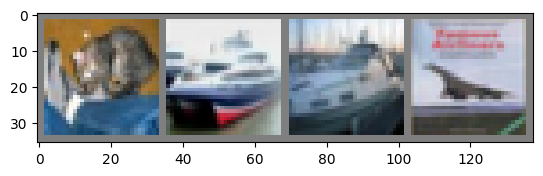

Predicted: ['bird', 'ship', 'ship', 'automobile']
Actual:    ['cat', 'ship', 'ship', 'airplane']


In [ ]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)

print("Predicted:", [classes[p] for p in predicted])
print("Actual:   ", [classes[l] for l in labels[:4]])


# Original code #1

Model architecture:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): R

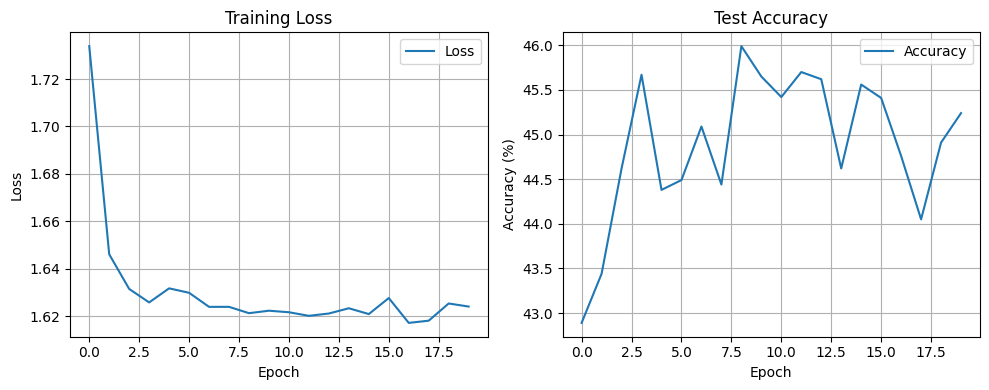

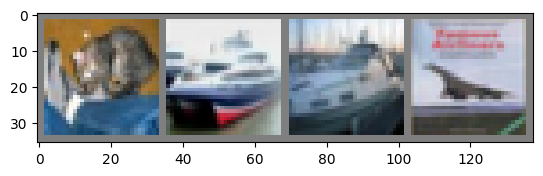

Predicted: ['cat', 'ship', 'ship', 'automobile']
Actual:    ['cat', 'ship', 'ship', 'airplane']


In [4]:
# 정답 코드
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
import time

# --------------------------
# 1. 데이터 전처리 및 로딩
# --------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = trainset.classes

# --------------------------
# 2. 모델 준비
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

print("Model architecture:")
print(model)

# --------------------------
# 3. 손실함수, Optimizer 설정
# --------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# --------------------------
# 4. 학습 루프
# --------------------------
epochs = 10
train_losses = []
test_accuracies = []

start_time = time.time()

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Test accuracy
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch + 1}/{epochs}] - Avg Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

end_time = time.time()
print(f"\n⏱️ Total training time: {end_time - start_time:.2f} seconds")

# --------------------------
# 5. 결과 시각화
# --------------------------

# 그래프 그리기
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. 예측 결과 시각화
# --------------------------
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)

print("Predicted:", [classes[p] for p in predicted])
print("Actual:   ", [classes[l] for l in labels[:4]])


## Add Preprocessing

> imagenet NORMALIZATION insert 41%-> 80% 



Using device: cuda
Model architecture:
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

/home/sojeong/miniconda3/envs/camcali/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sojeong/miniconda3/envs/camcali/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/50] - Avg Loss: 0.7922, Test Accuracy: 78.72%
Epoch [2/50] - Avg Loss: 0.6389, Test Accuracy: 79.13%
Epoch [3/50] - Avg Loss: 0.6259, Test Accuracy: 80.47%
Epoch [4/50] - Avg Loss: 0.6131, Test Accuracy: 78.28%
Epoch [5/50] - Avg Loss: 0.6080, Test Accuracy: 80.56%
Epoch [6/50] - Avg Loss: 0.6027, Test Accuracy: 80.39%
Epoch [7/50] - Avg Loss: 0.5964, Test Accuracy: 79.43%
Epoch [8/50] - Avg Loss: 0.5949, Test Accuracy: 80.00%

⏹️ Early stopping triggered at epoch 8

⏱️ Total training time: 267.19 seconds
✅ Loaded best model with accuracy: 80.56%


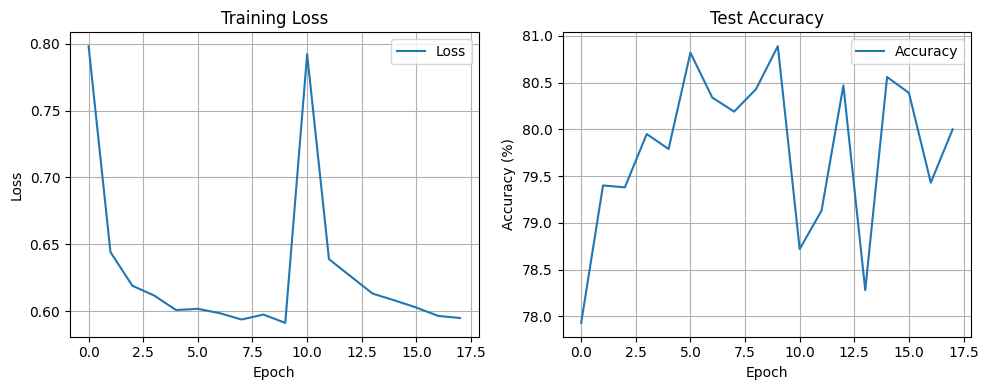

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7938564].


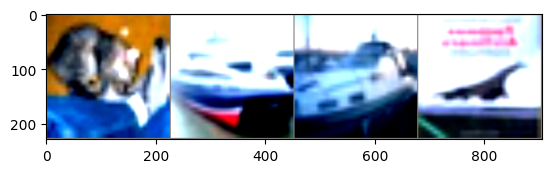

Predicted: ['cat', 'automobile', 'ship', 'airplane']
Actual:    ['cat', 'ship', 'ship', 'airplane']


In [2]:
# 정답 코드
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
import time

# --------------------------
# 1. 데이터 전처리 및 로딩
# --------------------------
transform = transforms.Compose([
    transforms.Resize(224),  # Resize to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

classes = trainset.classes

# --------------------------
# 2. 모델 준비
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

print("Model architecture:")
print(model)

# --------------------------
# 3. 손실함수, Optimizer 설정
# --------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# --------------------------
# 4. 학습 루프
# --------------------------
best_accuracy = 0.0
best_model_state = None
patience = 3
epochs_no_improve = 0
max_epochs = 50

start_time = time.time()

for epoch in range(max_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Test accuracy
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch + 1}/{max_epochs}] - Avg Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"\n⏹️ Early stopping triggered at epoch {epoch + 1}")
            break

end_time = time.time()
print(f"\n⏱️ Total training time: {end_time - start_time:.2f} seconds")

if best_model_state:
    model.load_state_dict(best_model_state)
    print(f"✅ Loaded best model with accuracy: {best_accuracy:.2f}%")


# --------------------------
# 5. 결과 시각화
# --------------------------

# 그래프 그리기
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. 예측 결과 시각화
# --------------------------
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)

print("Predicted:", [classes[p] for p in predicted])
print("Actual:   ", [classes[l] for l in labels[:4]])


In [4]:
!pip install torchsummary

Using device: cuda
Model architecture:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128


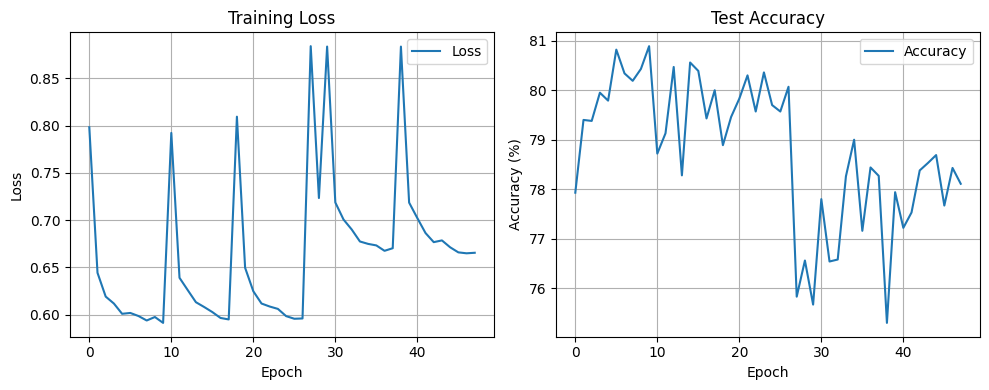

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7851416].


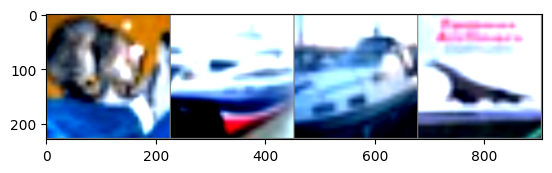

Predicted: ['cat', 'ship', 'ship', 'ship']
Actual:    ['cat', 'ship', 'ship', 'airplane']


In [8]:
# 정답 코드
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
import time
from torchsummary import summary

# --------------------------
# 1. 데이터 전처리 및 로딩
# --------------------------
transform = transforms.Compose([
    transforms.Resize(256),  # Resize to 256x256
    transforms.CenterCrop(224),  # Crop to 224x224
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet stats
                         std=[0.229, 0.224, 0.225])
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

classes = trainset.classes

# --------------------------
# 2. 모델 준비
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, 10)
model = model.to(device)

print("Model architecture:")
summary(model, input_size=(3,224,224))

# --------------------------
# 3. 손실함수, Optimizer 설정
# --------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

# --------------------------
# 4. 학습 루프
# --------------------------
best_accuracy = 0.0
best_model_state = None
patience = 3
epochs_no_improve = 0
max_epochs = 50

start_time = time.time()

for epoch in range(max_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Test accuracy
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch + 1}/{max_epochs}] - Avg Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"\n⏹️ Early stopping triggered at epoch {epoch + 1}")
            break

end_time = time.time()
print(f"\n⏱️ Total training time: {end_time - start_time:.2f} seconds")

if best_model_state:
    model.load_state_dict(best_model_state)
    print(f"✅ Loaded best model with accuracy: {best_accuracy:.2f}%")


# --------------------------
# 5. 결과 시각화
# --------------------------

# 그래프 그리기
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. 예측 결과 시각화
# --------------------------
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)

print("Predicted:", [classes[p] for p in predicted])
print("Actual:   ", [classes[l] for l in labels[:4]])


In [4]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 7.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


Using device: cuda
Model architecture:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128


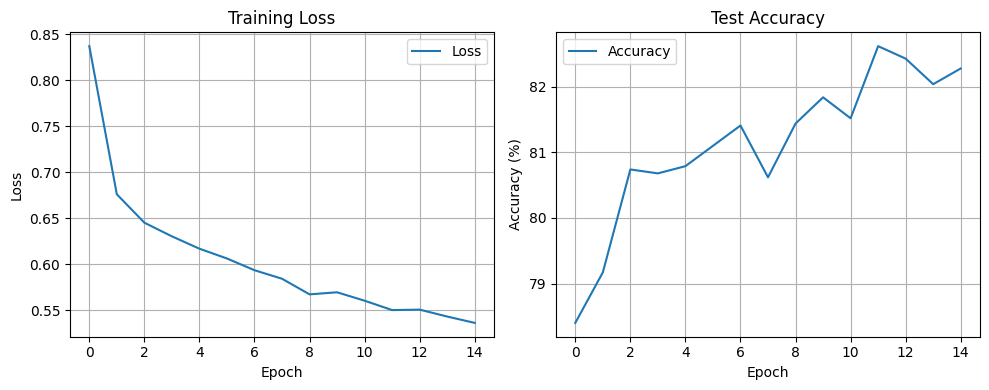

🖼️ Saved training plot to 'training_plot.png'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7938564].


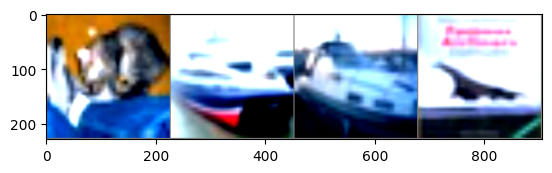

Predicted: ['cat', 'automobile', 'ship', 'airplane']
Actual:    ['cat', 'ship', 'ship', 'airplane']
📝 Saved predictions to 'predictions.txt'


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
import time
from torchsummary import summary
import pandas as pd
import os

# --------------------------
# 1. 데이터 전처리 및 로딩
# --------------------------
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)

classes = trainset.classes

# --------------------------
# 2. 모델 준비
# --------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(
    nn.Flatten(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 10)
    # nn.Linear(128, 10)
)
model = model.to(device)

print("Model architecture:")
summary(model, input_size=(3,224,224))

# --------------------------
# 3. 손실함수, Optimizer 설정
# --------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.0005)

# --------------------------
# 4. 학습 루프
# --------------------------
best_accuracy = 0.0
best_model_state = None
patience = 3
epochs_no_improve = 0
max_epochs = 50

train_losses = []
test_accuracies = []

start_time = time.time()

for epoch in range(max_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)

    # Test accuracy
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch [{epoch + 1}/{max_epochs}] - Avg Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.2f}%")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_state = model.state_dict()
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"\n⏹️ Early stopping triggered at epoch {epoch + 1}")
            break

end_time = time.time()
print(f"\n⏱️ Total training time: {end_time - start_time:.2f} seconds")

# Save best model
if best_model_state:
    model.load_state_dict(best_model_state)
    torch.save(model.state_dict(), "best_model.pth")
    print(f"✅ Loaded best model with accuracy: {best_accuracy:.2f}%")
    print("📁 Saved weights to 'best_model.pth'")

# --------------------------
# 5. Save results as CSV and plot
# --------------------------
log_df = pd.DataFrame({
    'Epoch': list(range(1, len(train_losses)+1)),
    'Train_Loss': train_losses,
    'Test_Accuracy': test_accuracies
})
log_df.to_csv("training_log.csv", index=False)
print("📄 Saved training log to 'training_log.csv'")

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("training_plot.png")
plt.show()
print("🖼️ Saved training plot to 'training_plot.png'")

# --------------------------
# 6. 예측 결과 저장 및 시각화
# --------------------------
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

outputs = model(images[:4].to(device))
_, predicted = torch.max(outputs, 1)

print("Predicted:", [classes[p] for p in predicted])
print("Actual:   ", [classes[l] for l in labels[:4]])

with open("predictions.txt", "w") as f:
    for i in range(4):
        f.write(f"Image {i+1} - Predicted: {classes[predicted[i]]}, Actual: {classes[labels[i]]}\n")
print("📝 Saved predictions to 'predictions.txt'")
